In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# by default, the data is split 60,000 for training 10,000 for testing
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_valid = x_train_full[:55000], x_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]

# reshape to have single channel
x_train = x_train.reshape(55000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_valid = x_valid.reshape(5000, 28, 28, 1)

# normalize the pixel value
x_train, x_test, x_valid = x_train/255, x_test/255, x_valid/255
print(x_train.shape, x_test.shape, x_valid.shape, y_train.shape, y_test.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(55000, 28, 28, 1) (10000, 28, 28, 1) (5000, 28, 28, 1) (55000,) (10000,) (5000,)


# CNN Architecture

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name="conv1"),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3) , activation='relu', name="conv2"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', name="dense1"),
    Dense(10, activation='softmax', name="output")
])

# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2 (Conv2D)              (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense1 (Dense)              (None, 128)               2

# Start Training

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback

test_accuracies = []

# Define a custom callback to evaluate the test set at the end of each epoch
test_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: test_accuracies.append(model.evaluate(x_test, y_test, verbose=0)[1]))

optimizer = Adam(learning_rate=0.001)  # Change the value of learning_rate as required

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=100,
    validation_data=(x_valid, y_valid),
    callbacks=[test_callback]
)


Epoch 1/100
1719/1719 [==============================] - 22s 5ms/step - loss: 0.1375 - accuracy: 0.9573 - val_loss: 0.0511 - val_accuracy: 0.9864
Epoch 2/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0467 - accuracy: 0.9856 - val_loss: 0.0399 - val_accuracy: 0.9894
Epoch 3/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0445 - val_accuracy: 0.9882
Epoch 4/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.0383 - val_accuracy: 0.9890
Epoch 5/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.0440 - val_accuracy: 0.9878
Epoch 6/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0410 - val_accuracy: 0.9908
Epoch 7/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0110 - accuracy: 0.9961 - val_loss: 0.0435 - val_a

# Evaluate the Model

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

# Save the model
model.save('mnist_cnn.model')


313/313 - 1s - loss: 0.1728 - accuracy: 0.9917 - 656ms/epoch - 2ms/step
Test accuracy: 0.9917


# Plot

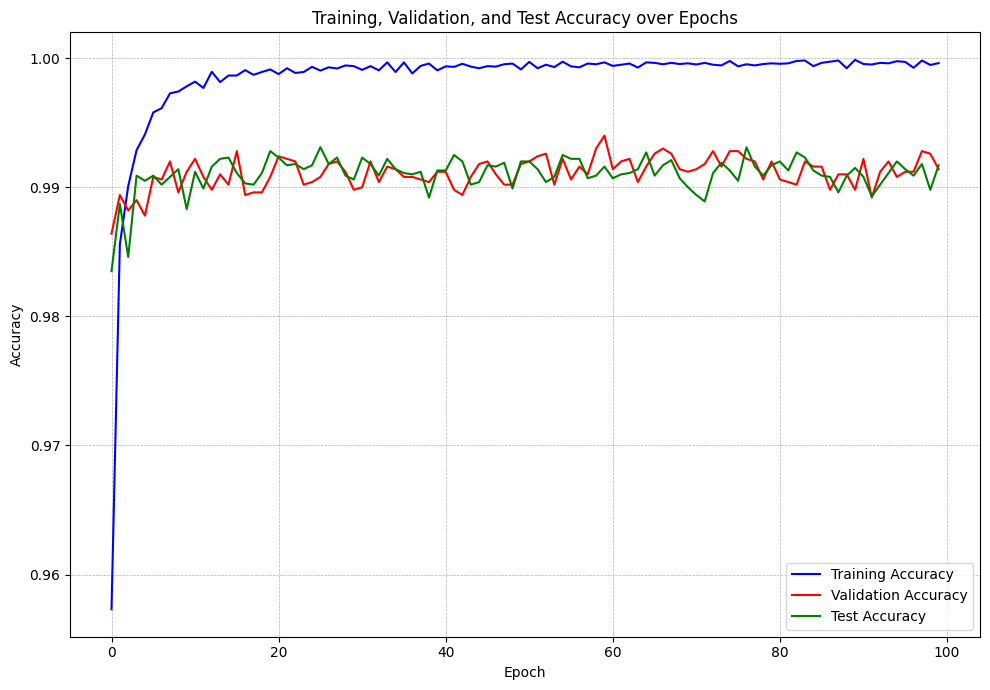

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.plot(test_accuracies, label='Test Accuracy', color='green') # Test accuracy is now a line graph
plt.title('Training, Validation, and Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


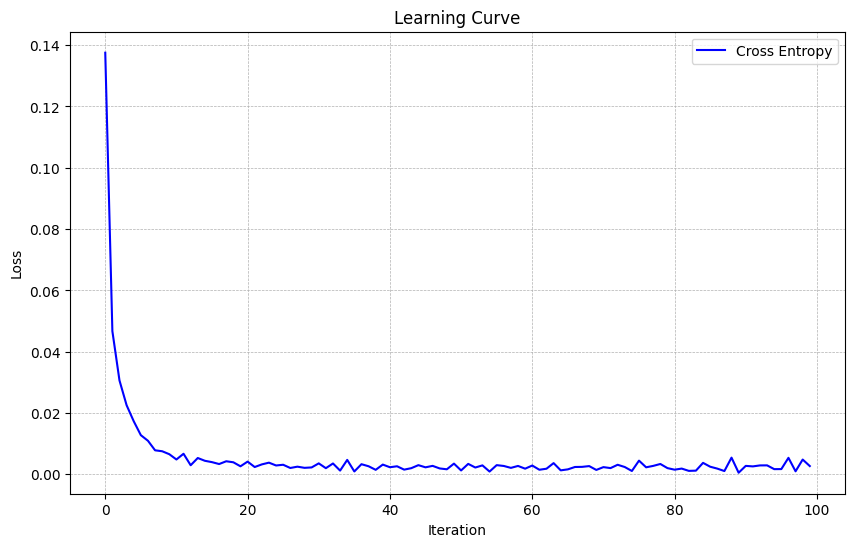

In [ ]:
# Learning Curve
training_loss = history.history['loss']

# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Cross Entropy', color='blue')

plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

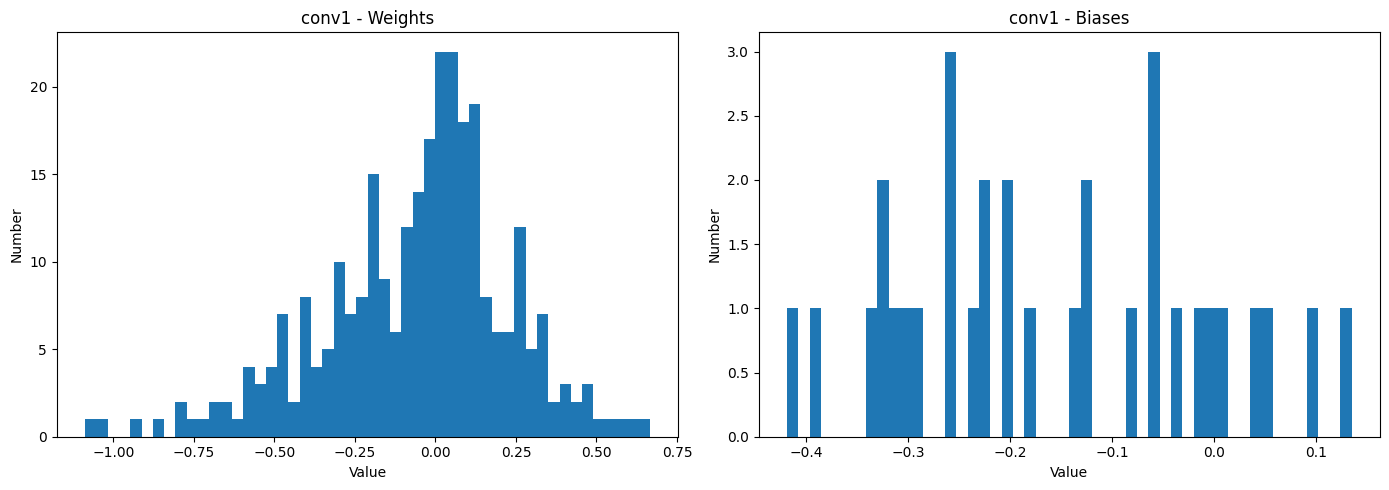

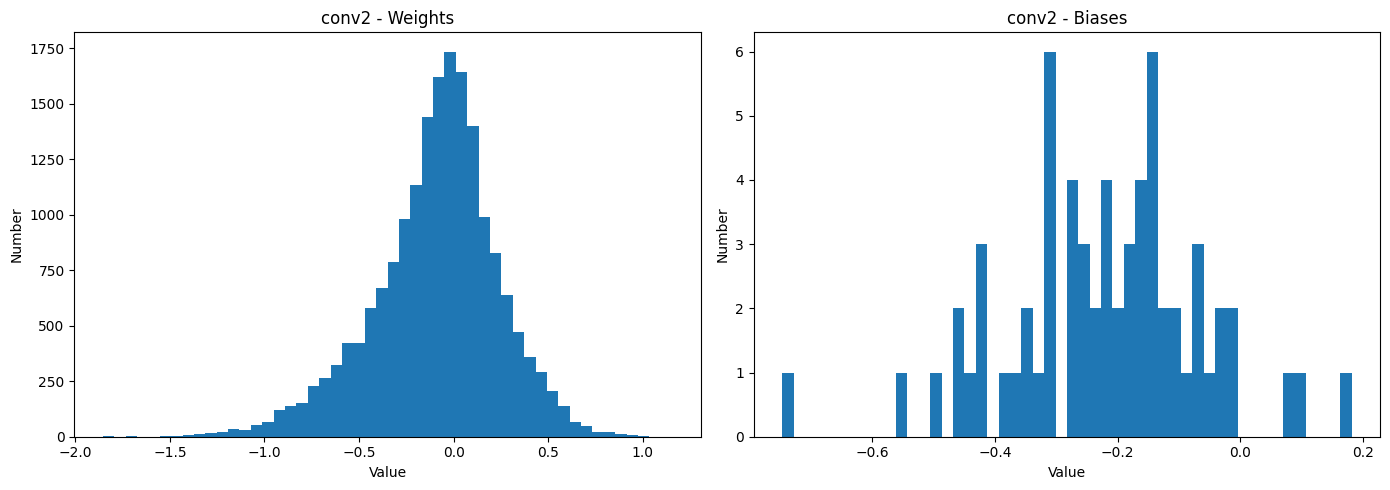

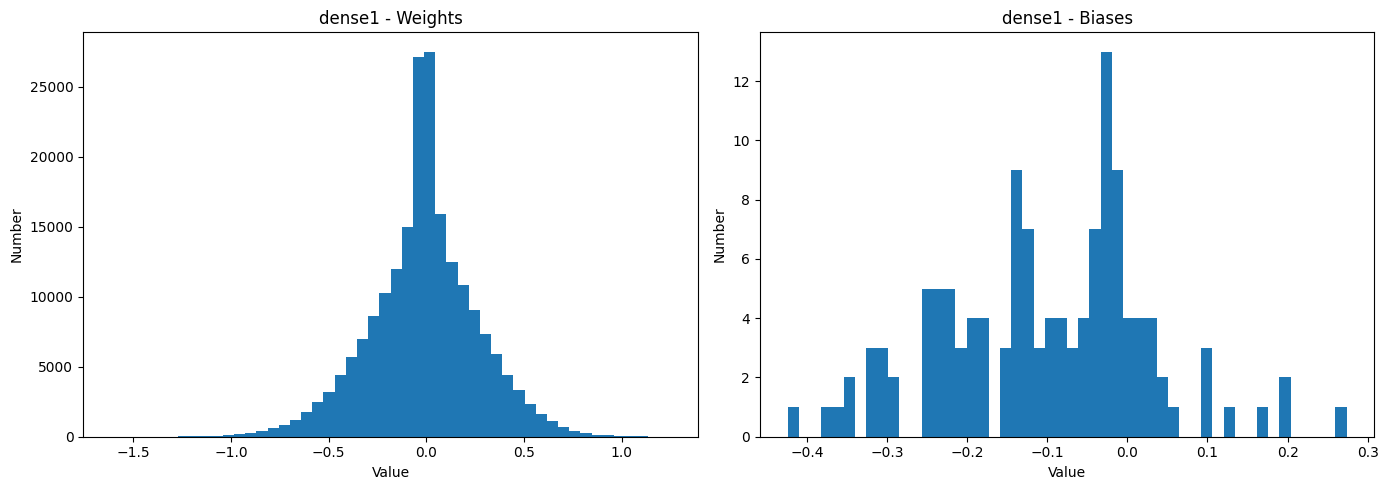

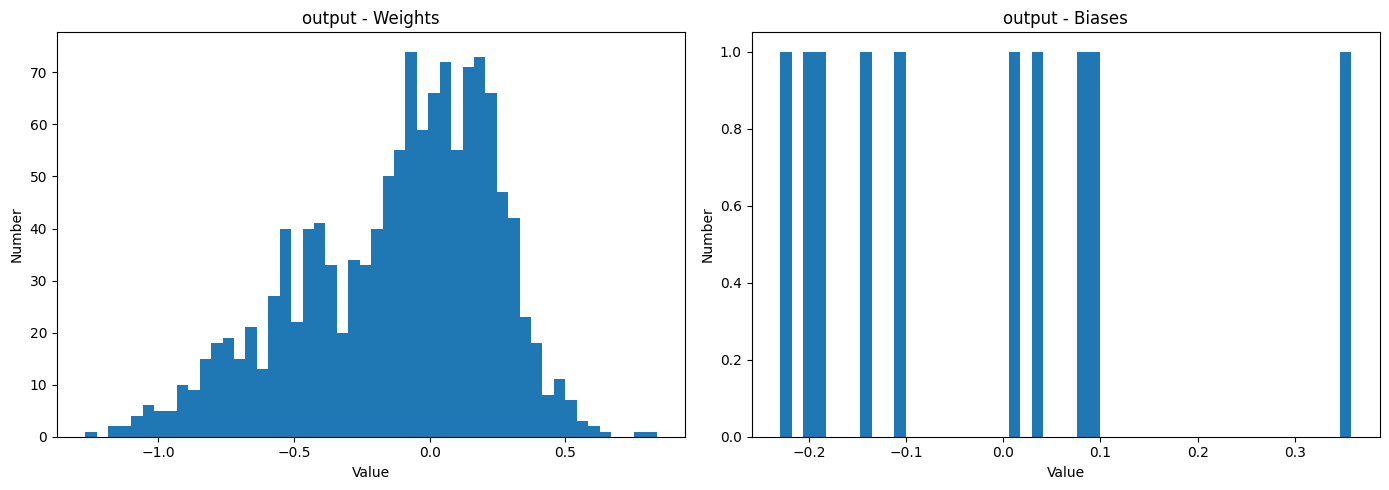

In [ ]:
for layer in model.layers:
    if isinstance(layer, (Conv2D, Dense)):
        weights, biases = layer.get_weights()
        plt.figure(figsize=(14, 5))

        # Weights histogram
        plt.subplot(1, 2, 1)
        plt.hist(weights.flatten(), bins=50)
        plt.title(layer.name + ' - Weights')
        plt.xlabel('Value')
        plt.ylabel('Number')

        # Biases histogram
        plt.subplot(1, 2, 2)
        plt.hist(biases.flatten(), bins=50)
        plt.title(layer.name + ' - Biases')
        plt.xlabel('Value')
        plt.ylabel('Number')

        plt.tight_layout()
        plt.show()


# Show correctly and miss-classified images

313/313 [==============================] - 1s 2ms/step


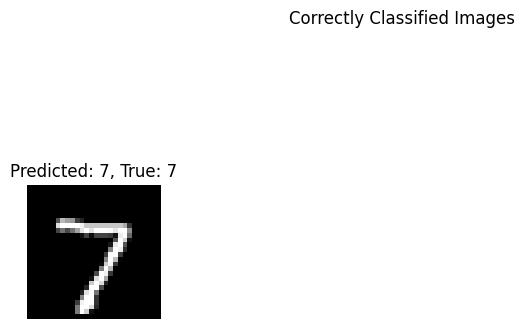

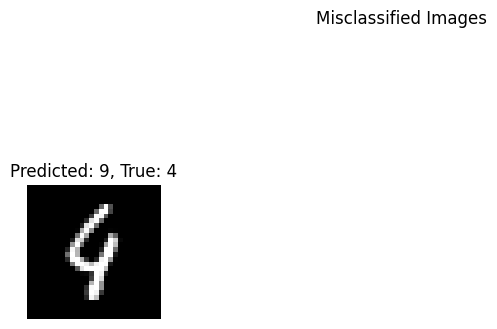

In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test

# Indices of correct and incorrect predictions
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

def display_images(indices, title):
    plt.figure(figsize=(10,5))
    for i, index in enumerate(indices[:1]): # Displaying only 1 from the list
        plt.subplot(1, 5, i+1)
        plt.imshow(x_test[index].reshape(28, 28), cmap='gray') # Assuming the images are 28x28
        plt.title(f"Predicted: {predicted_classes[index]}, True: {true_classes[index]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

display_images(correct_indices, "Correctly Classified Images")
display_images(incorrect_indices, "Misclassified Images")


# Show Feature Maps

1/1 [==============================] - 0s 115ms/step


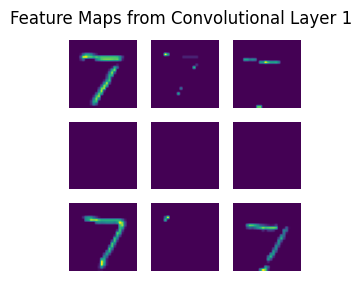

1/1 [==============================] - 0s 27ms/step


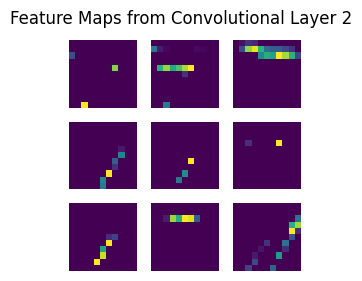

1/1 [==============================] - 0s 23ms/step


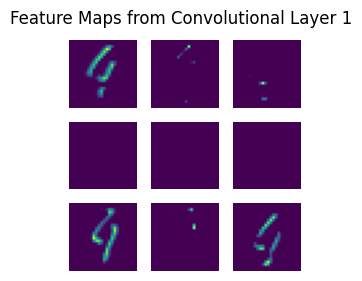

1/1 [==============================] - 0s 26ms/step


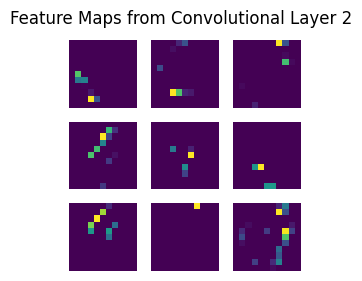

In [ ]:
from tensorflow.keras.models import Model

# Get the outputs of the layers
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]

# Create a new model that will return these outputs given the model input
activation_model = Model(inputs=model.input, outputs=layer_outputs)

def display_feature_maps(sample_image, layer_num=0):
    activations = activation_model.predict(sample_image.reshape(1, 28, 28, 1))
    layer_activation = activations[layer_num]

    # Number of feature maps/channels
    num_channels = layer_activation.shape[-1]

    display_grid_columns = 3
    display_grid_rows = 3
    num_feature_maps_to_display = display_grid_columns * display_grid_rows

    # If there are more than 36 feature maps, we'll only display the first 36
    num_channels = min(num_channels, num_feature_maps_to_display)


    plt.figure(figsize=(3, 3))
    for i in range(num_channels):
        plt.subplot(display_grid_columns, display_grid_rows, i+1)
        plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
        plt.axis('off')

    plt.suptitle(f"Feature Maps from Convolutional Layer {layer_num+1}")
    plt.show()

# Observe feature maps for an image from correct_indices
sample_correct_image = x_test[correct_indices[0]]
display_feature_maps(sample_correct_image, layer_num=0)  # Adjust layer_num to see feature maps from other convolutional layers
display_feature_maps(sample_correct_image, layer_num=1)

sample_incorrect_image = x_test[incorrect_indices[0]]
display_feature_maps(sample_incorrect_image, layer_num=0)  # Adjust layer_num to see feature maps from other convolutional layers
display_feature_maps(sample_incorrect_image, layer_num=1)

# Add L2 Regularization

In [ ]:
from tensorflow.keras.regularizers import l2

l2_lambda = 0.0001  # Adjust as necessary

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(l2_lambda), name='conv1'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l2_lambda), name='conv2'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda), name='dense1'),
    Dense(10, activation='softmax', name='output')
])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense1 (Dense)              (None, 128)              

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback

test_accuracies = []

# Define a custom callback to evaluate the test set at the end of each epoch
test_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: test_accuracies.append(model.evaluate(x_test, y_test, verbose=0)[1]))

adam_optimizer = Adam(learning_rate=0.0001)  # Change the value of learning_rate as required

model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=100,
    validation_data=(x_valid, y_valid),
    callbacks=[test_callback]
)

Epoch 1/100
1719/1719 [==============================] - 10s 5ms/step - loss: 0.4107 - accuracy: 0.9003 - val_loss: 0.1340 - val_accuracy: 0.9702
Epoch 2/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1343 - accuracy: 0.9671 - val_loss: 0.1130 - val_accuracy: 0.9754
Epoch 3/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1041 - accuracy: 0.9765 - val_loss: 0.0915 - val_accuracy: 0.9836
Epoch 4/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0890 - accuracy: 0.9813 - val_loss: 0.0860 - val_accuracy: 0.9842
Epoch 5/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0806 - accuracy: 0.9840 - val_loss: 0.0825 - val_accuracy: 0.9846
Epoch 6/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0734 - accuracy: 0.9860 - val_loss: 0.0744 - val_accuracy: 0.9878
Epoch 7/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0683 - accuracy: 0.9875 - val_loss: 0.0788 - val_a

# Evaluate the Model

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy:.4f}")

# Save the model
model.save('mnist_cnn_l2_regularization.model')

313/313 [==============================] - 1s 3ms/step - loss: 0.0367 - accuracy: 0.9920
Test accuracy: 0.9920


# Plot Training Curve

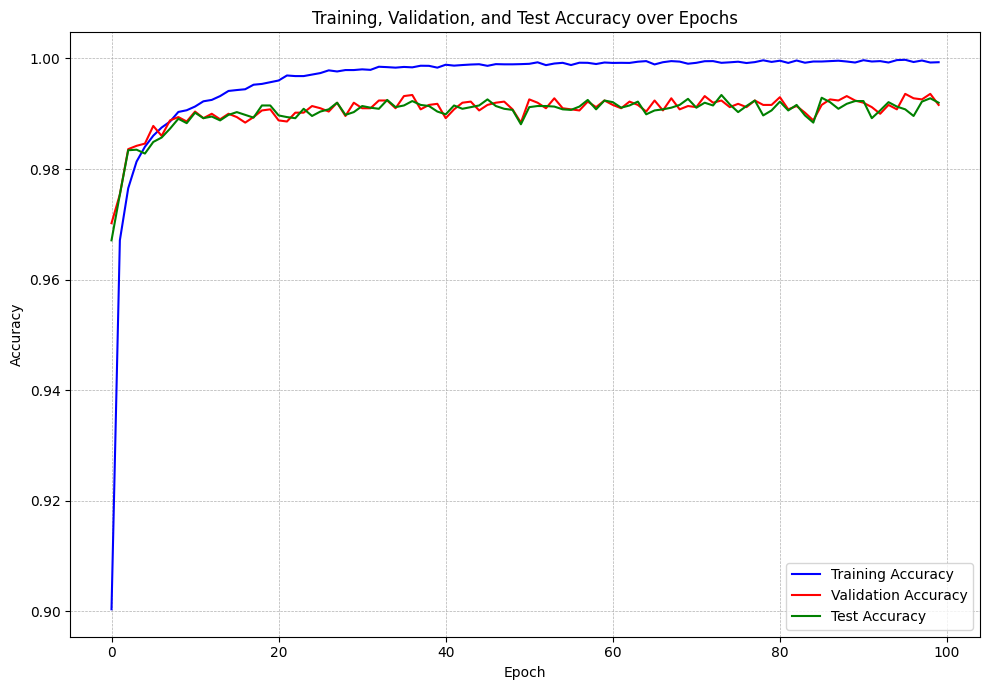

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.plot(test_accuracies, label='Test Accuracy', color='green') # Test accuracy is now a line graph
plt.title('Training, Validation, and Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# Plot Learning Curve

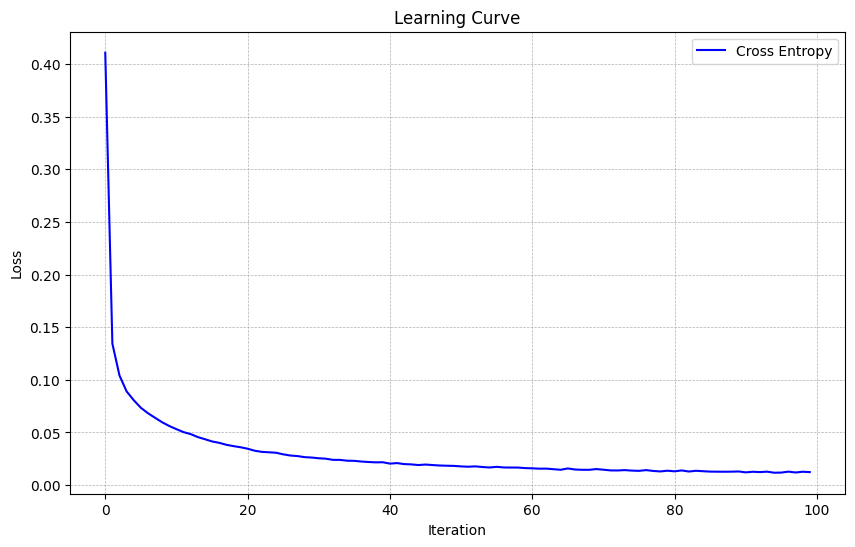

In [ ]:
# Learning Curve
training_loss = history.history['loss']

# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Cross Entropy', color='blue')

plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 [==============================] - 1s 3ms/step - loss: 0.0367 - accuracy: 0.9920
Test Accuracy: 99.20%


# Plot Histogram of each Layer

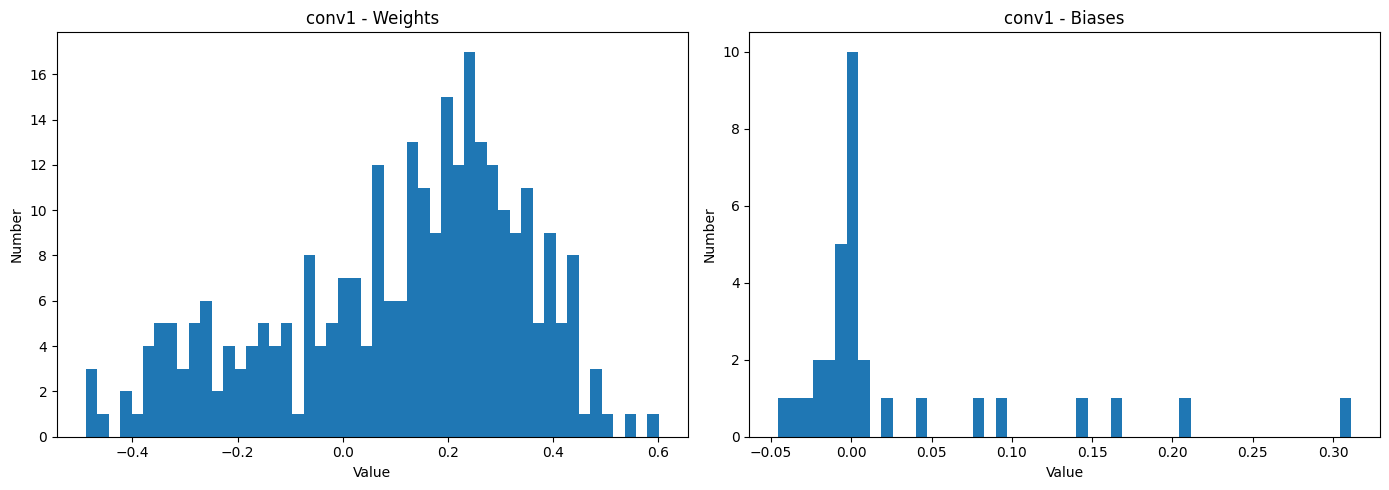

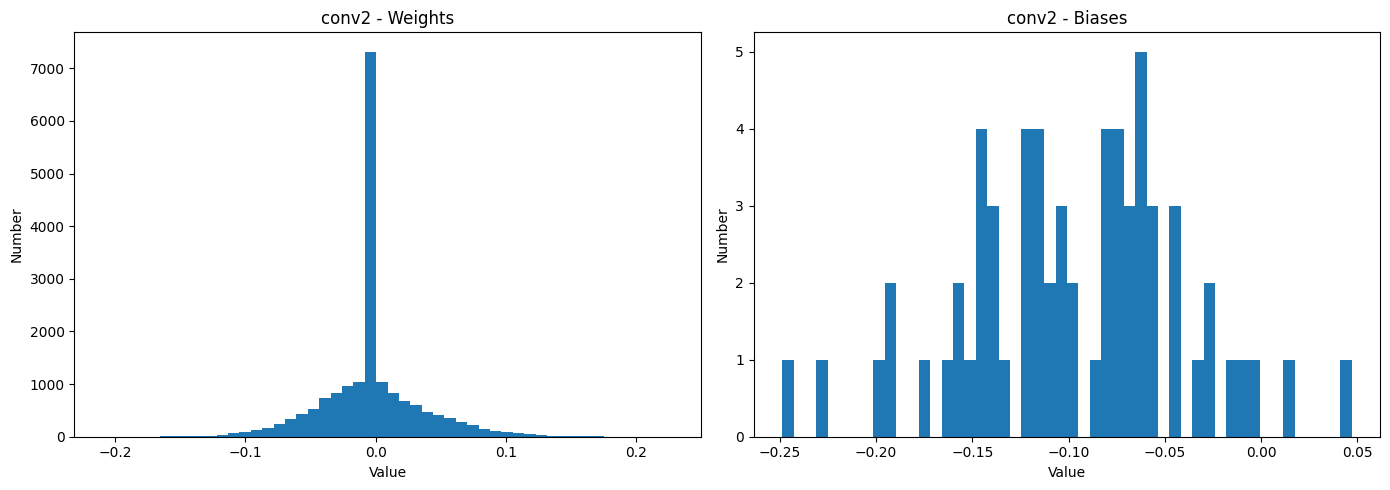

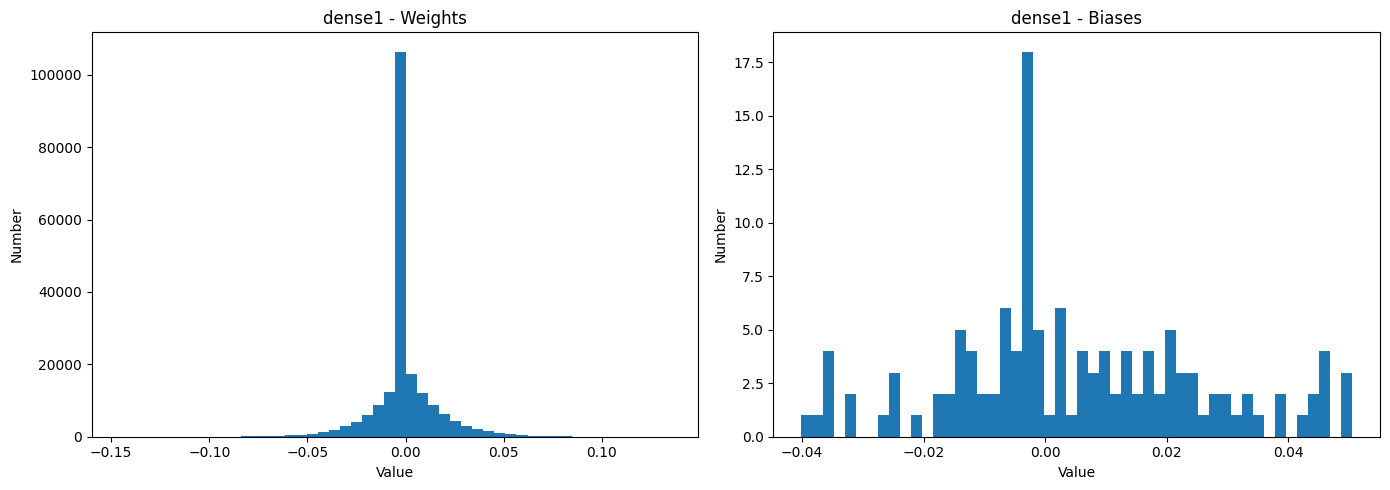

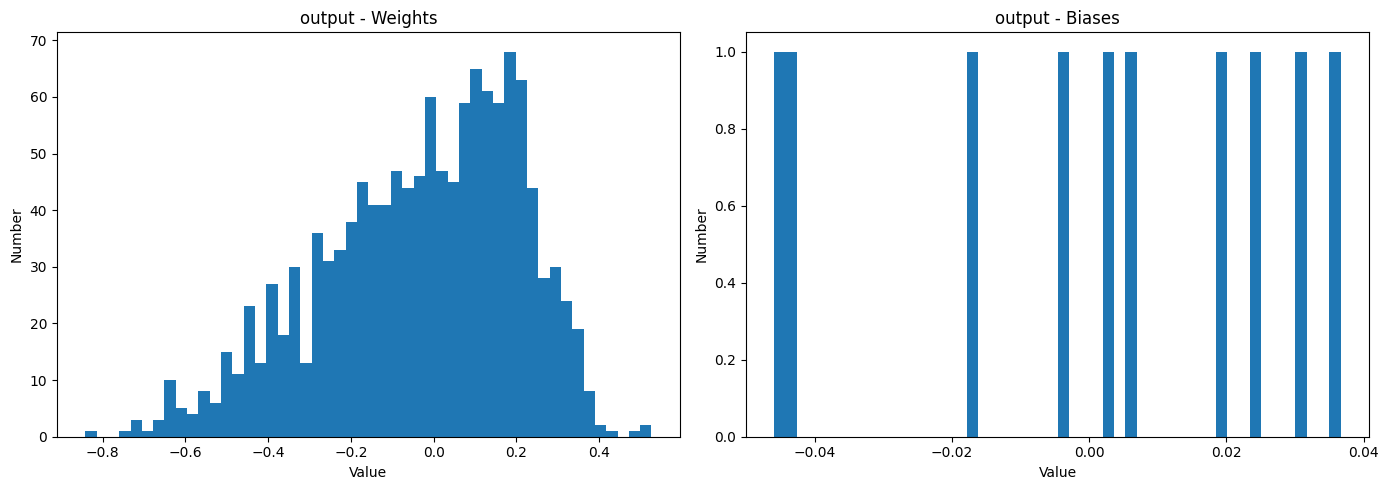

In [ ]:
for layer in model.layers:
    if isinstance(layer, (Conv2D, Dense)):
        weights, biases = layer.get_weights()
        plt.figure(figsize=(14, 5))

        # Weights histogram
        plt.subplot(1, 2, 1)
        plt.hist(weights.flatten(), bins=50)
        plt.title(layer.name + ' - Weights')
        plt.xlabel('Value')
        plt.ylabel('Number')

        # Biases histogram
        plt.subplot(1, 2, 2)
        plt.hist(biases.flatten(), bins=50)
        plt.title(layer.name + ' - Biases')
        plt.xlabel('Value')
        plt.ylabel('Number')

        plt.tight_layout()
        plt.show()
